# Sentdex keras tutorial p.1

- [video](https://www.youtube.com/watch?v=wQ8BIBpya2k&list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN)
- [notes](https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import sys
print(np.__version__)
print(tf.__version__)
print(sys.version)

C:\Users\AFMS\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.14.2
1.10.0
3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:27:44) [MSC v.1900 64 bit (AMD64)]


In [2]:
mnist = tf.keras.datasets.mnist # 28x28 images of written digits 0-9
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
x_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

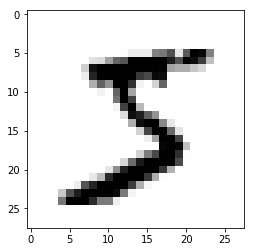

In [5]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
X = np.concatenate([x_train, x_test])
print(X.shape)
X = tf.keras.utils.normalize(X, axis=1)
print(X.dtype)
print(X.min().min(), X.max().max())
xtr = X[0:60000, :]
print(xtr.shape)
xtst = X[60000:70000, :]
print(xtst.shape)

(70000, 28, 28)
float64
0.0 1.0
(60000, 28, 28)
(10000, 28, 28)


In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(xtr, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 27s 442us/step - loss: 0.2654 - acc: 0.9231
Epoch 2/3
60000/60000 [==============================] - 19s 319us/step - loss: 0.1097 - acc: 0.9660
Epoch 3/3
60000/60000 [==============================] - 19s 317us/step - loss: 0.0757 - acc: 0.9758


In [15]:
val_loss, val_acc = model.evaluate(xtst, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 106us/step
0.09252026631757616 0.9707


In [16]:
model.save('epic_num_reader.model')

In [17]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [18]:
predictions = new_model.predict([xtst])
print(predictions)

[[1.0557189e-08 6.3452454e-08 2.3685081e-05 ... 9.9989140e-01
  1.5422262e-07 2.0419121e-07]
 [1.9919740e-07 1.3791707e-04 9.9985492e-01 ... 6.4045764e-09
  3.7745693e-07 3.6330602e-11]
 [1.1322285e-05 9.9932313e-01 2.9504257e-05 ... 2.2685206e-04
  1.7865797e-04 3.2000085e-06]
 ...
 [8.3259835e-09 3.2201553e-06 3.3018704e-08 ... 4.4891294e-05
  2.1418286e-05 5.1094870e-05]
 [5.2092832e-06 8.3578279e-08 4.1019499e-07 ... 3.7632492e-07
  1.8188073e-03 2.9306914e-08]
 [2.8695790e-06 9.4277817e-07 4.1798799e-07 ... 2.8904568e-09
  1.7902425e-06 2.7660285e-08]]


In [19]:
# 1 hot arrays
print(np.argmax(predictions[0]))

7


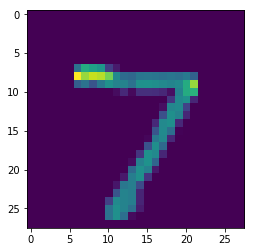

In [20]:
plt.imshow(xtst[0])